# MNIST - NN - PyTorch

In [36]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import helper
%matplotlib inline

In [27]:
def get_accuracy(predicted, target):
    correct = 0
    for p, y in zip(predicted, target):
        if p.max(0)[1] == y.max(0)[1]:
            correct += 1
    return correct/predicted.shape[0]*100

## Сургалтын өгөгдөл унших

In [53]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

trainset = datasets.MNIST('.', download=False, train=True, transform=transform)
testset = datasets.MNIST('.', download=False, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=150, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, shuffle=True)
print('Сургах өгөгдөл:', len(trainset))
print('Шалгах өгөгдөл:', len(testset))
print('Batch тоо:', len(trainloader))
batch_count = len(trainloader)

Сургах өгөгдөл: 60000
Шалгах өгөгдөл: 10000
Batch тоо: 400


## Давхаргуудын хэмжээ

In [54]:
input_size = 784
hidden_sizes = [392]
output_size = 10

## Модель

Input -> Hidden 1 -> ReLU -> Output -> Softmax

Loss: Negative Log Likelihood Loss

Optimizer: Stochastic Gradient Descend

In [56]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.Softmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

## Сургах

In [57]:
# Epoch
epochs = 5

for e in range(1, epochs + 1):
    batch_n = 0
    epoch_loss = 0
    epoch_accuracy = 0
    print('Epoch:', e, '/', epochs)
    # Batch
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
#         epoch_accuracy += get_accuracy(output, labels)
        
        batch_n += 1
        helper.print_progress(batch_n, batch_count, loss=epoch_loss/batch_n, accuracy=0)
    else:
        print('')
#         print('\tTraining loss:', epoch_loss/len(trainloader))

Epoch: 1 / 5
[============================================================] 100.0% 400/400 loss: -0.10971 accuracy: 0.00000%
Epoch: 2 / 5
[============================================================] 100.0% 400/400 loss: -0.13915 accuracy: 0.00000%
Epoch: 3 / 5
[============================================================] 100.0% 400/400 loss: -0.19808 accuracy: 0.00000%
Epoch: 4 / 5
[============================================================] 100.0% 400/400 loss: -0.26369 accuracy: 0.00000%
Epoch: 5 / 5
[============================================================] 100.0% 400/400 loss: -0.31667 accuracy: 0.00000%


## Шалгах

(tensor(0.5646), tensor(4))


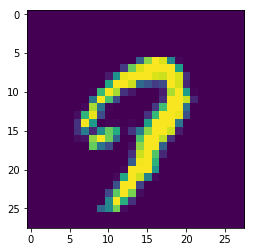

In [74]:
images, labels = next(iter(testloader))

img = images[0]
img_v = img.view(1, 784)

with torch.no_grad():
    logits = model.forward(img_v)

plt.imshow(img[0])
print(logits[0].max(0))

In [63]:
correct = 0
for image, label in testloader:
    img_v = img.view(1, 784)
    with torch.no_grad():
        logits = model.forward(img_v)
    if logits[0].max(0)[1] == label:
        correct += 1
print(correct)

1135
